In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()

In [2]:
from utils.load_data import load_data
from utils.train_model import train_model
from utils.visualize import visualize_model, imshow

In [3]:
dataloaders, dataset_sizes, class_names = load_data('../data')

In [4]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')

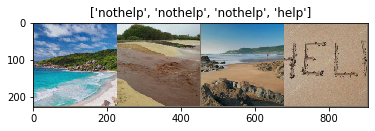

In [5]:
inputs, classes = next(iter(dataloaders['val']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [6]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum = 0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

train_loaders = {x: dataloaders[x] for x in ['train', 'val']}

In [7]:
model_ft = train_model(model_ft, dataloaders, dataset_sizes, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

Epoch 0/14
----------
train Loss: 0.6111 Acc: 0.7551
val Loss: 0.3388 Acc: 0.8733
Epoch time: 3m 48s

Epoch 1/14
----------
train Loss: 0.5403 Acc: 0.7804
val Loss: 0.2255 Acc: 0.9144
Epoch time: 3m 57s

Epoch 2/14
----------
train Loss: 0.4221 Acc: 0.8234
val Loss: 0.2384 Acc: 0.9144
Epoch time: 3m 58s

Epoch 3/14
----------
train Loss: 0.3517 Acc: 0.8523
val Loss: 0.1457 Acc: 0.9521
Epoch time: 4m 56s

Epoch 4/14
----------
train Loss: 0.3074 Acc: 0.8718
val Loss: 0.1767 Acc: 0.9521
Epoch time: 4m 5s

Epoch 5/14
----------
train Loss: 0.2468 Acc: 0.9070
val Loss: 0.1064 Acc: 0.9658
Epoch time: 3m 58s

Epoch 6/14
----------
train Loss: 0.2369 Acc: 0.9113
val Loss: 0.1165 Acc: 0.9692
Epoch time: 3m 58s

Epoch 7/14
----------
train Loss: 0.1455 Acc: 0.9440
val Loss: 0.1204 Acc: 0.9555
Epoch time: 3m 57s

Epoch 8/14
----------
train Loss: 0.1323 Acc: 0.9531
val Loss: 0.1092 Acc: 0.9658
Epoch time: 3m 58s

Epoch 9/14
----------
train Loss: 0.1330 Acc: 0.9543
val Loss: 0.1027 Acc: 0.9589
E

In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data in dataloaders['test']:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print('Accuracy of the model on {} test images is {:.2f}'.format(dataset_sizes['test'], 100*correct/total))

Accuracy of the model on 540 test images is 95.74


In [10]:
torch.save(model_ft.state_dict(), '../models/resnet18_0')